# Color histograms

In [22]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn

plt.rcParams["figure.figsize"] = [10, 10]

(-0.5, 511.5, 511.5, -0.5)

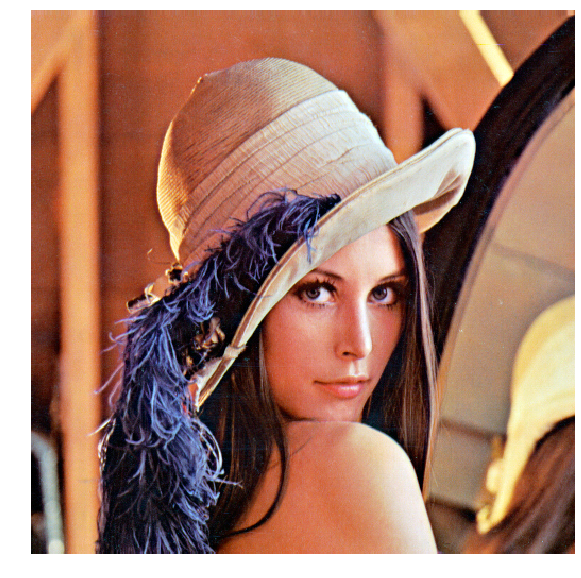

In [25]:
im = cv2.imread('assets/images/lena_color.png', cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.axis('off')

## 2D histograms

In [36]:
def hist2d(im, ch1, ch2, ch1_name, ch2_name):
    """Create a 3d histogram of im from channel ch1 and channel ch2"""
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y = np.random.rand(2, 100) * 4
    x = im[:, :, ch1].ravel()
    y = im[:, :, ch2].ravel()
    hist, xedges, yedges = np.histogram2d(x, y, bins=10)

    # Construct arrays for the anchor positions of the 16 bars.
    # Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
    # ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
    # with indexing='ij'.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    # Construct arrays
    dx = 10 * np.ones_like(zpos)
    dy = dx.copy()
    dz = hist.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    ax.set_xlabel(ch1_name)
    ax.set_ylabel(ch2_name)
    
    plt.savefig('assets/images/hist2d_'+ch1_name+'_'+ch2_name+'.png', bbox_inches='tight', transparent=True)

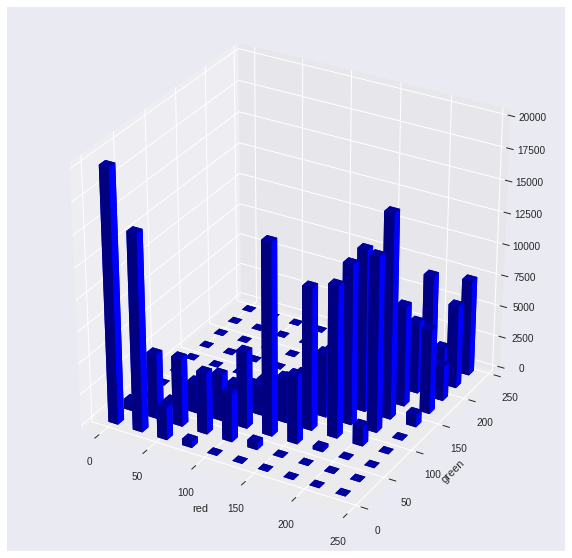

In [37]:
hist2d(im, 0, 1, 'red', 'green')

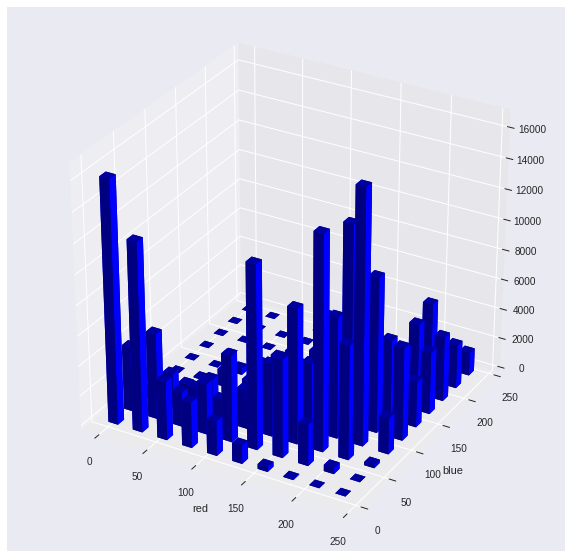

In [38]:
hist2d(im, 0, 2, 'red', 'blue')

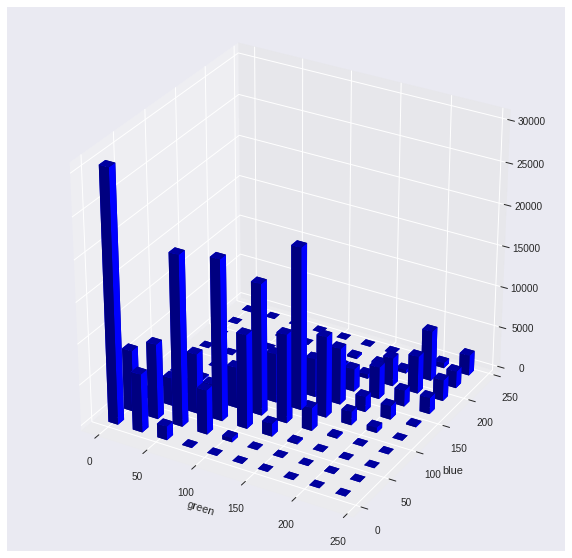

In [39]:
hist2d(im, 1, 2, 'green', 'blue')

## 1D histograms

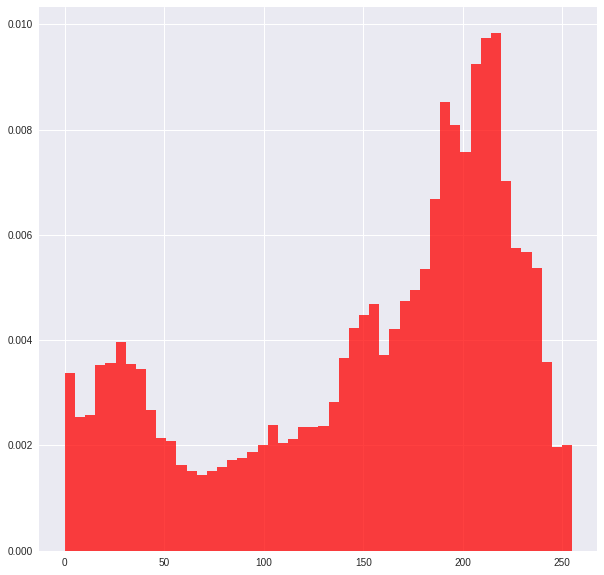

In [40]:
n, bins, patches = plt.hist(im[:, :, 0].ravel(), 50, normed=1, facecolor='red', alpha=0.75)
plt.savefig('assets/images/hist1d_red.png', bbox_inches='tight', transparent=True)

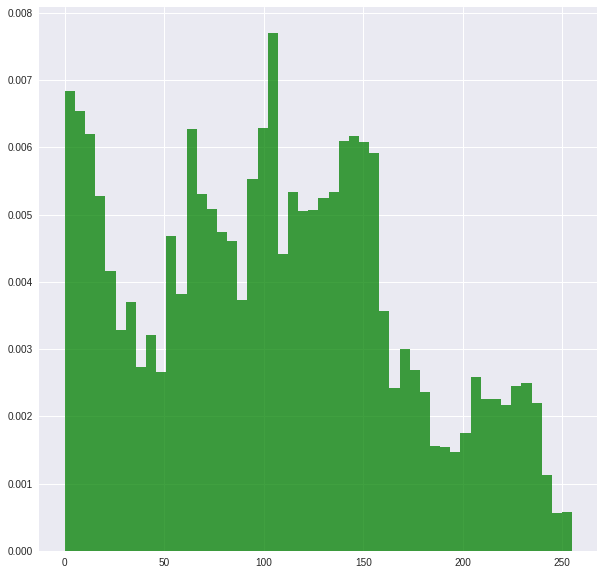

In [43]:
n, bins, patches = plt.hist(im[:, :, 1].ravel(), 50, normed=1, facecolor='green', alpha=0.75)
plt.savefig('assets/images/hist1d_green.png', bbox_inches='tight', transparent=True)

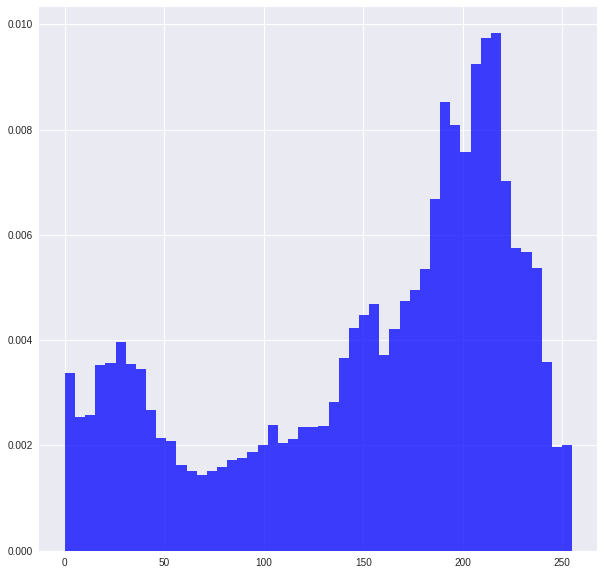

In [42]:
n, bins, patches = plt.hist(im[:, :, 0].ravel(), 50, normed=1, facecolor='blue', alpha=0.75)
plt.savefig('assets/images/hist1d_blue.png', bbox_inches='tight', transparent=True)